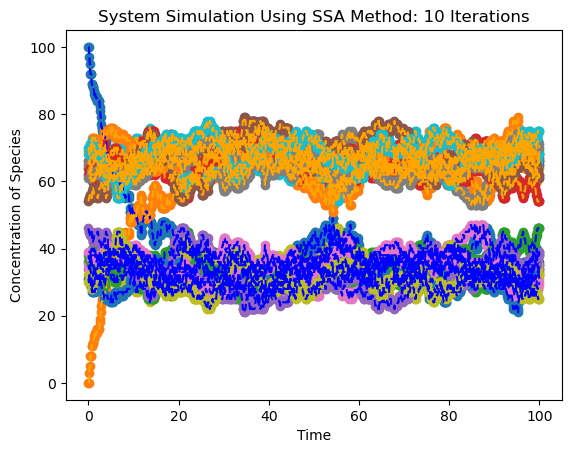

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import tellurium as te
import gillespy2

# Simulate with ODE
# System variables
k1 = 0.1
k2 = 0.05
A_0 = 100
B_0 = 0
t_0 = 0
t_end = 100
num_steps = 1000

model = te.loada('''
     k1=0.1; k2=0.05; A=100; B=0;
     A -> B; k1*A;
     B -> A; k2*B;
''')

model.reset()
model.integrator = 'gillespie'

plt.figure()

for i in range(10):
    A_conc = np.zeros(num_steps)
    B_conc = np.zeros(num_steps)
    A_conc[0] = A_0
    B_conc[0] = B_0
    results = model.simulate(t_0, t_end, num_steps)
    time = results[:, 0]
    A_conc = results[:, 1]
    B_conc = results[:, 2]
    plt.scatter(time, A_conc)
    plt.scatter(time, B_conc)
    plt.plot(time, A_conc, linestyle='dashed', color='blue')
    plt.plot(time, B_conc, linestyle='dashed', color='orange')

plt.title('System Simulation Using SSA Method: 10 Iterations', fontsize=12)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Concentration of Species', fontsize=10)
plt.show()


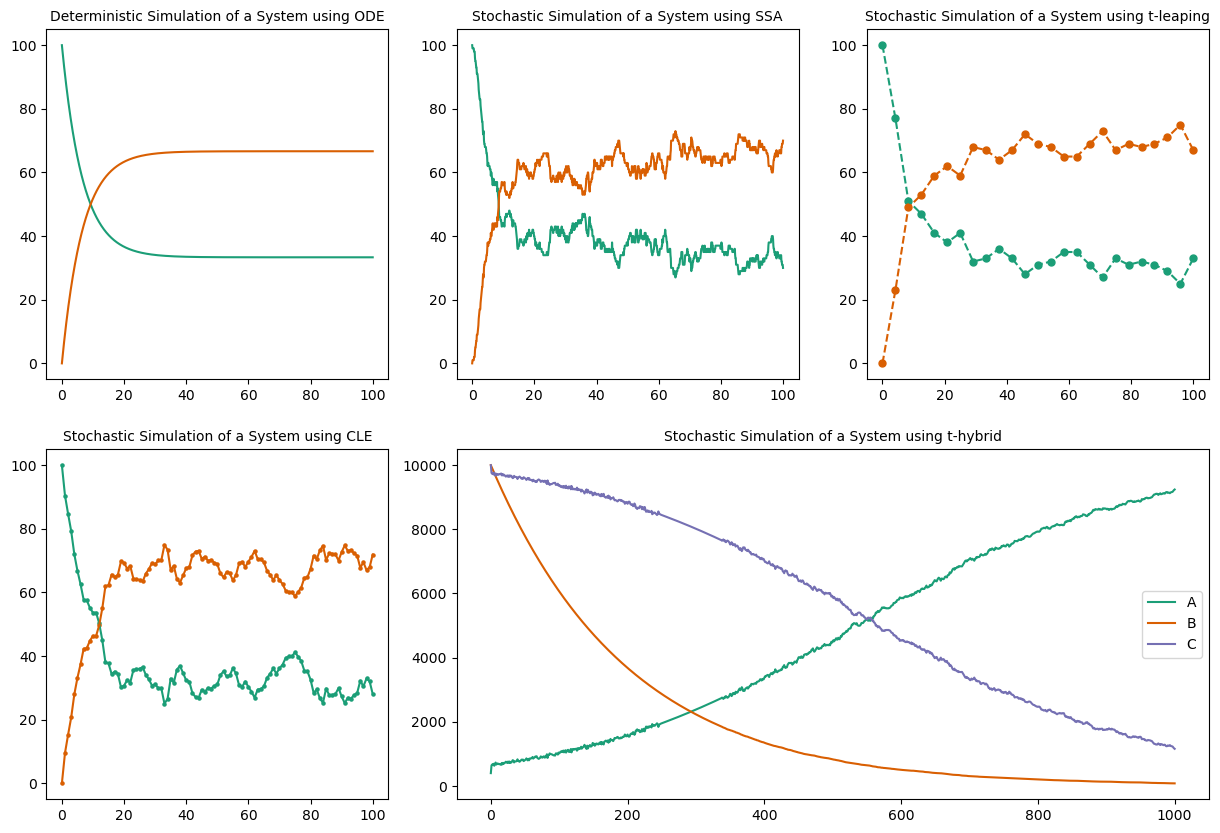

In [100]:
import numpy as np
from scipy.integrate import odeint
import tellurium as te
import matplotlib.pyplot as plt
import gillespy2


k1 = 0.1
k2 = 0.05
A_0 = 100
B_0 = 0
t_0 = 0
t_end = 100

def my_model(parameter_values=None):
    model = gillespy2.Model(name='reversible reaction')
    k_1 = gillespy2.Parameter(name='k_1', expression=k1)
    k_2 = gillespy2.Parameter(name='k_2', expression=k2)
    model.add_parameter([k_1, k_2])
    m = gillespy2.Species(name='reactant', initial_value=A_0)
    d = gillespy2.Species(name='product',   initial_value=B_0)
    model.add_species([m, d])
    r_1 = gillespy2.Reaction(name="r_forward", rate=k_1, reactants={m:1}, products={d:1})
    r_2 = gillespy2.Reaction(name="r_backward", rate=k_2, reactants={d:1}, products={m:1})
    model.add_reaction([r_1, r_2])
    tspan = gillespy2.TimeSpan.linspace(t=t_end, num_points=101)
    model.timespan(tspan)
    return model

model = my_model()
results = model.run(algorithm='CLE') 

p1 = results['product']
t1 = results['time']
r1 = results['reactant']

def my_model(parameter_values=None):
    model = gillespy2.Model(name='reversible reaction')
    k_1 = gillespy2.Parameter(name='k_1', expression=k1)
    k_2 = gillespy2.Parameter(name='k_2', expression=k2)
    model.add_parameter([k_1, k_2])
    m = gillespy2.Species(name='reactant', initial_value=A_0)
    d = gillespy2.Species(name='product',   initial_value=B_0)
    model.add_species([m, d])
    r_1 = gillespy2.Reaction(name="r_forward", rate=k_1, reactants={m:1}, products={d:1})
    r_2 = gillespy2.Reaction(name="r_backward", rate=k_2, reactants={d:1}, products={m:1})
    model.add_reaction([r_1, r_2])
    tspan = gillespy2.TimeSpan.linspace(t=t_end, num_points=25)
    model.timespan(tspan)
    return model

model = my_model()
results = model.run(algorithm='Tau-Leaping') 

p2 = results['product']
t2 = results['time']
r2 = results['reactant']

def my_model(parameter_values=None):
    model = gillespy2.Model(name='reversible reaction')
    k_1 = gillespy2.Parameter(name='k_1', expression=k1)
    k_2 = gillespy2.Parameter(name='k_2', expression=k2)
    model.add_parameter([k_1, k_2])
    m = gillespy2.Species(name='reactant', initial_value=A_0)
    d = gillespy2.Species(name='product',   initial_value=B_0)
    model.add_species([m, d])
    r_1 = gillespy2.Reaction(name="r_forward", rate=k_1, reactants={m:1}, products={d:1})
    r_2 = gillespy2.Reaction(name="r_backward", rate=k_2, reactants={d:1}, products={m:1})
    model.add_reaction([r_1, r_2])
    tspan = gillespy2.TimeSpan.linspace(t=t_end, num_points=1001)
    model.timespan(tspan)
    return model

model = my_model()
results = model.run(algorithm='SSA') 

p3 = results['product']
t3 = results['time']
r3 = results['reactant']

def AutomaticSwitchExample(parameter_values=None):
    model = gillespy2.Model(name="Automatic Switch Example")
    k1 = gillespy2.Parameter(name='k1', expression=3e-4)
    k2 = gillespy2.Parameter(name='k2', expression=0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression=2e-1)
    model.add_parameter([k1,k2,k3])
    A = gillespy2.Species(name='A', initial_value=400)
    B = gillespy2.Species(name='B', initial_value=10000)
    C = gillespy2.Species(name='C', initial_value=10000)
    model.add_species([A, B, C])
    r1 = gillespy2.Reaction(name="r1", rate=k1, reactants={A:1,B:1}, products={B:1,C:1})
    r2 = gillespy2.Reaction(name="r2", rate=k2, reactants={B:1}, products={})
    r3 = gillespy2.Reaction(name="r3", rate=k3, reactants={C:1}, products={A:1})
    model.add_reaction([r1,r2,r3])
    tspan = gillespy2.TimeSpan.linspace(1000, 1001)
    model.timespan(tspan)
    return model
model = AutomaticSwitchExample()
results5 = model.run(algorithm="Tau-Hybrid")



def my_model(parameter_values=None):  
    model = gillespy2.Model(name='reversible reaction')
    k_1 = gillespy2.Parameter(name='k_1', expression=k1)
    k_2 = gillespy2.Parameter(name='k_2', expression=k2)
    model.add_parameter([k_1, k_2])
    m = gillespy2.Species(name='reactant', initial_value=A_0)
    d = gillespy2.Species(name='product',   initial_value=B_0)
    model.add_species([m, d])
    r_1 = gillespy2.Reaction(name="r_forward", rate=k_1, reactants={m:1}, products={d:1})
    r_2 = gillespy2.Reaction(name="r_backward", rate=k_2, reactants={d:1}, products={m:1})
    model.add_reaction([r_1, r_2])
    tspan = gillespy2.TimeSpan.linspace(t=t_end, num_points=1001)
    model.timespan(tspan)
    return model

model = my_model()
results = model.run(algorithm='ODE') 

p = results['product']
t = results['time']
r = results['reactant']

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(t, r, label='A')
plt.plot(t, p, label='B')
plt.title('Deterministic Simulation of a System using ODE', fontsize=10)

plt.subplot(2,3,2)
plt.plot(t3, r3, label='A')
plt.plot(t3, p3, label='B')
plt.title('Stochastic Simulation of a System using SSA', fontsize=10)

plt.subplot(2,3,4)
plt.scatter(t1, r1, s=5)
plt.scatter(t1, p1, s=5)
plt.plot(t1, r1, label='A')
plt.plot(t1, p1, label='B')
plt.title('Stochastic Simulation of a System using CLE', fontsize=10)

plt.subplot(2,3,3)
plt.scatter(t2, r2, label='A', s=25)
plt.scatter(t2, p2, label='B', s=25)
plt.plot(t2, r2, linestyle='dashed')
plt.plot(t2, p2, linestyle='dashed')
plt.title('Stochastic Simulation of a System using t-leaping', fontsize=10)


plt.subplot(2,3,(5,6))
for species in results5[0]:
    if species == 'time':
        continue
    plt.plot(results5[0]['time'], results5[0][species], label='{0}'.format(species))
plt.title('Stochastic Simulation of a System using t-hybrid', fontsize=10)
plt.legend(loc='best')

plt.show()




2023-06-17 11:55:48.099 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


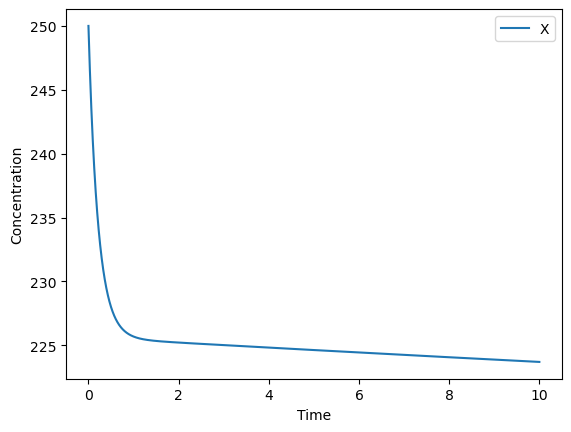

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pysb import Model, Monomer, Parameter, Initial, Rule, Observable
from pysb.simulator import ScipyOdeSimulator

# Define the model
model = Model()

# Define the monomers
Monomer('A')
Monomer('X')
Monomer('B')

# Define the rate constants
Parameter('k1', 0.0000003)
Parameter('k2', 0.0001)
Parameter('k3', 0.003)
Parameter('k4', 3.5)

# Define the initial conditions
Parameter('A_0', 100000)
Parameter('X_0', 250)
Parameter('B_0', 200000)
Initial(A(), A_0)
Initial(X(), X_0)
Initial(B(), B_0)

# Define the observables
Observable('A_total', A())
Observable('X_total', X())
Observable('B_total', B())

# Define the rules for the reactions
Rule('A_plus_2X_to_3X', A() + X() + X() >> X() + X() + X(), k1)
Rule('threeX_to_A_plus_2X', X() + X() + X() >> A() + X() + X(), k2)
Rule('B_to_X', B() >> X(), k3)
Rule('X_to_B', X() >> B(), k4)

# Define the simulation time
t = np.linspace(0, 10, 10000)

# Run the simulation
simulator = ScipyOdeSimulator(model, tspan=t)
result = simulator.run()

# Plot the results

plt.plot(t, result.observables['X_total'], label='X')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()
